# 파이썬 활용 디지털마케팅 데이터분석 및 기획

# Today's mission

- 신규 지표 개발
- 문제 정의(배경 및 목적)
- 분석 프레임(지표 생성 과정, 추가 고려사항)
- 데이터 탐색 및 변수 선정(판정 기준 선택&패턴 이해)
- 데이터 전처리 및 분석(변수 탐색 및 선정)
- 신규 스코어 산출 및 대시보드 구축(모델 학습 및 가중치 산출, 대시보드 생성)
- 신규 지표 개발 : 분석 보고서 작성 및 결과 토론

]

## Day05-2A 신규 지표 개발 - 데이터 탐색 및 변수 선정

- 데이터 탐색 및 변수 선정(판정 기준 선택&패턴 이해)
- 데이터 전처리 및 분석(변수 탐색 및 선정)

### 데이터 탐색

데이터 탐색 과정을 통해 얻고자 하는 목적은 아래와 같다.

- 기존 DAU 를 대체할 수 있고 보다 정확한 Active 판정 기준은 무엇인가?
- 가설적인 여러 판정 기준 중 가장 적합한 기준은 무엇인가?
- 범주변인 (예, 국가별, 기준별, 플랫폼별, 결제유무 등)으로 구분했을 때, Activeness 패턴이 어떻게 달라지는가

###  가설적 판정 기준

배경에서 설명한 대로 단순히 DAU라는 지표를 통해 활동성을 트래킹하고 있는 상황이므로 앱을 실행하기만 해도 허수가 잡히게 된다.  
따라서 가설적으로 몇 개의 Activeness 판정 기준을 설정해 데이터를 추출하고 탐색을 위한 준비를 진행할 필요가 있다.  
가설적 판단 기준을 정의할 때 도메인 전문가의 지식을 이용하는 것이 효과적이다.

- option 1. 파일을 View 했을 경우 Active 로 판정
- option 2. 파일을 View and (Edit or Export) 했을 경우 Active 판정

###  Dataset

이번에 추출된 데이터셋의 경우, 일반적인 경우와 조금 다르게 범주변인의 flag 를 잘 활용하여 분석을 진행해야 한다.  
우선 데이터셋을 불러와서 데이터의 형태를 이해하도록 하자.

## Day05-2B 신규 지표 개발 (실습) - 데이터 EDA

pd.read_table 명령어를 통해 데이터를 읽어오고, head(), info() 함수를 통해 데이터 형상을 확인하도록 하자.

- 일별 Active 유저수 카운트 (국가별, 기준별, 플랫폼별 구분)
- 데이터 포멧이 일반적인 포멧과 다름 (대부분 카테고리 변수, 하나의 컬럼만 집계된 결과)
- if dataType == 'all', View + Edit + Export
- if dataType == 'view', View only
- if values = 'ALL': 모든 범주변인의 합산
- all and ALL are different values

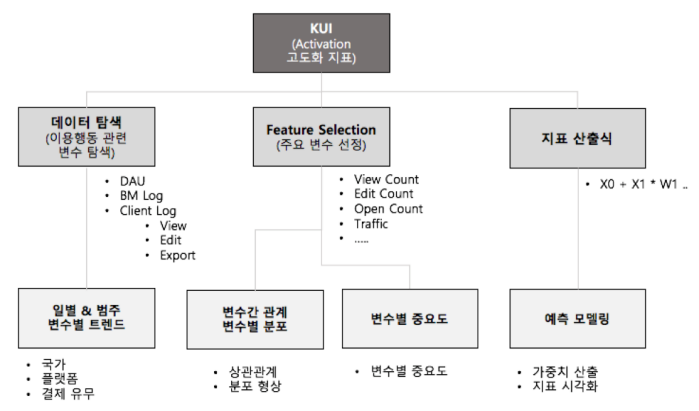

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

Day05-2A 신규 지표 개발 실습 - Activness 데이터 EDA

### File Info.
- 일별 Active 유저수 (국가별, 기준별, 플랫폼별 구분)
- 데이터 포멧이 일반적인 포멧과 다름 (대부분 카테고리 변수, 하나의 컬럼만 집계된 결과) 따라서 이용에 주의 필요

- `pd.read_table` 명령어를 통해 데이터를 읽어오고, `head()`, `info()` 함수를 통해 데이터 형상을 확인하도록 하자.

In [2]:
df = pd.read_csv("data/kuiData.csv")

In [3]:
df.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
0,1475852400,all,1,1,1,0,--,9
1,1475852400,all,1,1,1,0,A1,6
2,1475852400,all,1,1,1,0,AF,21
3,1475852400,all,1,1,1,0,AI,1
4,1475852400,all,1,1,1,0,AL,308


In [4]:
df.tail()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
249287,1476543600,view,ALL,ALL,ALL,ALL,VN,6956
249288,1476543600,view,ALL,ALL,ALL,ALL,WS,1
249289,1476543600,view,ALL,ALL,ALL,ALL,YE,193
249290,1476543600,view,ALL,ALL,ALL,ALL,ZA,4846
249291,1476543600,view,ALL,ALL,ALL,ALL,ZM,234


In [5]:
df.shape

(249292, 8)

### Column Info.

- datatime: 수집 날짜 (timestamp 형식)
- dataType: 데이터 유형
    - 기존에는 로그인이 active 기준
    - 개선안 후보 1) 문서 보기: **if dataType == 'view'**
    - 개선안 후보 2) 문서 보기 or 수정 or 내보내기: **if dataType == 'all'**
 
- 카테고리 변수
    - deviceTypeNo: 디바이스 유형 (중요x)
    - osTypeNo: OS 유형
    - aswTypeNo: 플랫폼 유형
    - isPaid: 유료 무료 여부
    - if 위 컬럼에서 values가 == 'ALL': 모든 범주변인의 합산
- Note: all and ALL means different status
- countryCode: 국가코드
- userCount: 유저수

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249292 entries, 0 to 249291
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   datetime      249292 non-null  int64 
 1   dataType      249292 non-null  object
 2   deviceTypeNo  249292 non-null  object
 3   osTypeNo      249292 non-null  object
 4   aswTypeNo     249292 non-null  object
 5   isPaid        249292 non-null  object
 6   countryCode   248394 non-null  object
 7   userCount     249292 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 15.2+ MB


In [7]:
df.isnull().sum()

datetime          0
dataType          0
deviceTypeNo      0
osTypeNo          0
aswTypeNo         0
isPaid            0
countryCode     898
userCount         0
dtype: int64

In [8]:
# type convert
df['datetime'] = pd.to_datetime(df['datetime'], unit='s').dt.date # timestamp to datetime of pd

In [9]:
df.dataType.value_counts()

all     146273
view    103019
Name: dataType, dtype: int64

- all (active 판정기준 1)
    - view or edit or export
- view (active 판정기준 2)
    - view only

In [10]:
df.deviceTypeNo.value_counts()

ALL    110356
1       56382
6       35438
3       34328
2       12788
Name: deviceTypeNo, dtype: int64

- deviceTypeNo
    - 1: Mobile
    - 2: Pad
    - 3: Web
    - 6: PC

In [11]:
df.osTypeNo.value_counts()

ALL    82361
3      49037
1      45650
2      34935
4      23895
5       6960
7       5552
0        854
6         48
Name: osTypeNo, dtype: int64

- osTypeNo code
    - Android = 1
    - iOS = 2
    - Windows = 3
    - Mac = 4

In [12]:
df.aswTypeNo.value_counts()

ALL    110356
1       56382
6       35438
3       34328
2       12788
Name: aswTypeNo, dtype: int64

- aswtypeno
    - 1: App
    - 6: PC
    - 3: Sync
    - 2: Web

In [13]:
df.isPaid.value_counts()

ALL    110448
0      110206
1       28638
Name: isPaid, dtype: int64

- isPaid Code
    - 0: 무료 유저
    - 1: 유료 유저

In [14]:
df.countryCode.value_counts()

ALL    2901
US     2693
KR     2660
JP     2379
GB     2317
       ... 
YT      128
CF      128
WS      128
CK       64
KI       48
Name: countryCode, Length: 230, dtype: int64

In [15]:
df[df.isnull().any(axis=1)].head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
161,2016-10-07,all,1,1,1,ALL,NaN,273
396,2016-10-07,all,1,2,1,0,NaN,7
925,2016-10-07,all,1,ALL,ALL,0,NaN,280
1160,2016-10-07,all,2,3,ALL,0,NaN,1
1216,2016-10-07,all,2,3,ALL,ALL,NaN,1


In [16]:
df[df['countryCode'].str.match('[A-Z]') == False]

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
0,2016-10-07,all,1,1,1,0,--,9
274,2016-10-07,all,1,1,ALL,ALL,--,9
488,2016-10-07,all,1,2,ALL,0,--,1
572,2016-10-07,all,1,2,ALL,ALL,--,1
689,2016-10-07,all,1,5,ALL,ALL,--,1
...,...,...,...,...,...,...,...,...
248635,2016-10-15,view,ALL,4,ALL,ALL,--,1
248705,2016-10-15,view,ALL,5,ALL,ALL,--,1
248862,2016-10-15,view,ALL,ALL,1,ALL,--,7
248994,2016-10-15,view,ALL,ALL,6,0,--,3


In [17]:
# missing values
df1 = df.replace('--', np.nan).dropna(subset = ['countryCode'])

In [18]:
for cols in df1.loc[:,'deviceTypeNo':'isPaid'].columns:
    print (len(df1[df1[cols].str.match('[A-Z0-9]') == False]))

0
0
0
0


In [19]:
df1.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [20]:
df1.isnull().sum()

datetime        0
dataType        0
deviceTypeNo    0
osTypeNo        0
aswTypeNo       0
isPaid          0
countryCode     0
userCount       0
dtype: int64

In [21]:
df1.datetime.value_counts().sort_index()

2016-10-07    27000
2016-10-08    26616
2016-10-09    27690
2016-10-10    28060
2016-10-11    28095
2016-10-12    27803
2016-10-13    28322
2016-10-14    27257
2016-10-15    26447
Name: datetime, dtype: int64

### DataType 분리후 EDA

- Activeness
    - if dataType == 'all', **View or Edit or Export** 기준
    - if dataType == 'view', **View** 기준
- Cate
    - if values = 'ALL': 모든 범주변인의 합산

- **all and ALL are different vales**

### 데이터 탐색 : Activeness 세분화

사전적으로 분석(分析)이란, 얽혀 있거나 복잡한 것을 풀어서 개별적인 요소나 성질로 나눔으로 정의된다.  
즉 집계된 하나의 지표를 MECE 철학에 근거해 최대한 쪼개고 나눔으로써 그 본질을 이해하는 것이 분석 과정이라 할 수 있다.

새로운 판정 기준으로 선택된 Activeness 지표를 여러 범주 변인을 기준으로 세분화함으로써 지표에 대한 이해를 높일 필요가 있다.  
데이터셋의 주요 범주 변인은 아래와 같다. 해당 범주 변인들은 독립적으로 구분되지만, 서로 상호작용 효과를 살펴볼 수도 있다.

- osType: Andriod, iOS, Win, Mac
- isPaid: Free, Paid
- countryCode: KR, US ...

**함수 생성 및 필터링**

만약 거의 동일한 조건을 반복해서 실행할 경우 함수를 생성하여 작업하는 것이 효율적이다.

In [22]:
# df all-based active
df_all = df1.query("dataType == 'all'")

# df view-based active
df_view = df1.query("dataType == 'view'")

In [23]:
print(len(df_all))
print(len(df_view))

145117
102173


In [24]:
df_all.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [25]:
# all base total
df_all_tot = df_all.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' & aswTypeNo == 'ALL' & isPaid == 'ALL' & countryCode == 'ALL'")

In [26]:
df_all_tot.head(10)

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
14316,2016-10-07,all,ALL,ALL,ALL,ALL,ALL,897602
41320,2016-10-08,all,ALL,ALL,ALL,ALL,ALL,792150
68748,2016-10-09,all,ALL,ALL,ALL,ALL,ALL,1014554
96845,2016-10-10,all,ALL,ALL,ALL,ALL,ALL,1118078
125108,2016-10-11,all,ALL,ALL,ALL,ALL,ALL,1125967
153329,2016-10-12,all,ALL,ALL,ALL,ALL,ALL,1137472
181640,2016-10-13,all,ALL,ALL,ALL,ALL,ALL,1172697
209694,2016-10-14,all,ALL,ALL,ALL,ALL,ALL,915171
236717,2016-10-15,all,ALL,ALL,ALL,ALL,ALL,777353


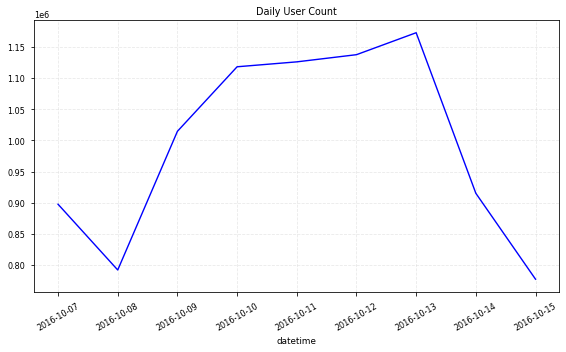

In [27]:
plt.subplots(figsize=(8,5))

df_all_tot.groupby("datetime")['userCount'].sum().plot(rot=30, c='b')

plt.title("Daily User Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [28]:
# view base total
df_view_tot = df_view.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' & aswTypeNo == 'ALL' & isPaid == 'ALL' & countryCode == 'ALL'")

In [29]:
df_view_tot.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
8971,2016-10-07,view,ALL,ALL,ALL,ALL,ALL,784724
36041,2016-10-08,view,ALL,ALL,ALL,ALL,ALL,668074
63238,2016-10-09,view,ALL,ALL,ALL,ALL,ALL,895476
91303,2016-10-10,view,ALL,ALL,ALL,ALL,ALL,1009002
119572,2016-10-11,view,ALL,ALL,ALL,ALL,ALL,1007868


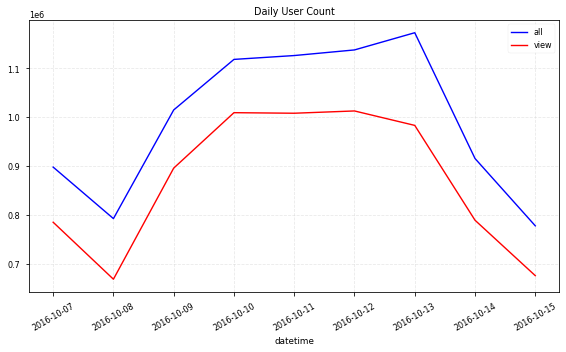

In [30]:
plt.subplots(figsize=(8,5))

df_all_tot.groupby("datetime")['userCount'].sum().plot(rot=30, c='b', label='all')
df_view_tot.groupby("datetime")['userCount'].sum().plot(rot=30, c='r', label='view')

plt.title("Daily User Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

In [31]:
# original DAU index
dates_idx = pd.date_range('20161007', periods=9)

# values
dau = pd.Series([1097686, 966350, 1264246, 1388723, 1389716, 1401294, 1367030, 1143068, 1011094], index=dates_idx)

In [32]:
dau

2016-10-07    1097686
2016-10-08     966350
2016-10-09    1264246
2016-10-10    1388723
2016-10-11    1389716
2016-10-12    1401294
2016-10-13    1367030
2016-10-14    1143068
2016-10-15    1011094
Freq: D, dtype: int64

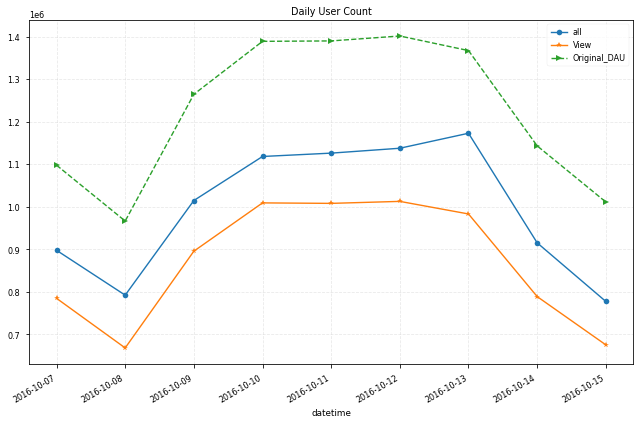

In [33]:
plt.figure(figsize=(9,6))

df_all_tot.groupby("datetime")['userCount'].sum().plot(marker='o', label='all');
df_view_tot.groupby("datetime")['userCount'].sum().plot(marker='*', label='View');
dau.plot(marker='>', linestyle='dashed', label='Original_DAU');

plt.title("Daily User Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

**Note**

- 원래 DAU 값과 2가지 기준의 값에 큰 GAP 존재 (허수)
- 세 지표의 트렌드는 유사함
- datatype = all 인경우가 activeness 로서 적절할 것으로 판단
    - 기존에서 변화가 보수적
    - edit, export는 누락하는 것은 부적절

In [34]:
df_all.head() # df.query("dataType == 'all'")

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [35]:
df_all.shape

(145117, 8)

### osTypeNo 기준 데이터탐색

In [36]:
df_all.drop("dataType", axis=1, inplace=True)

In [37]:
df_all.head(10)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,1,1,1,0,A1,6
2,2016-10-07,1,1,1,0,AF,21
3,2016-10-07,1,1,1,0,AI,1
4,2016-10-07,1,1,1,0,AL,308
5,2016-10-07,1,1,1,0,AO,184
6,2016-10-07,1,1,1,0,AR,23123
7,2016-10-07,1,1,1,0,AU,2967
8,2016-10-07,1,1,1,0,AX,1
9,2016-10-07,1,1,1,0,BB,23
10,2016-10-07,1,1,1,0,BE,2202


In [38]:
df_all.osTypeNo.value_counts()

ALL    48069
3      32176
1      23899
2      18317
4      15624
5       3480
7       2888
0        632
6         32
Name: osTypeNo, dtype: int64

- osTypeNo code
    - Android = 1
    - iOS = 2
    - Windows = 3
    - Mac = 4
    - 나머지는 unknown

In [39]:
# 탐색용 함수 생성
def df_by_type(df, devicetype, ostype, aswtype, ispaid, countryCode):

    df = df[(df['deviceTypeNo'] == devicetype) & (df['osTypeNo'] == ostype)  \
            & (df['aswTypeNo'] == aswtype) & (df['isPaid'] == ispaid) & (df['countryCode'] == countryCode)]

    return df

In [40]:
# create four dataframe based on the condition
df_aos = df_by_type(df_all, 'ALL', '1', 'ALL', 'ALL', 'ALL')

df_aos.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
12476,2016-10-07,ALL,1,ALL,ALL,ALL,770994
39484,2016-10-08,ALL,1,ALL,ALL,ALL,649334
66816,2016-10-09,ALL,1,ALL,ALL,ALL,845110
94897,2016-10-10,ALL,1,ALL,ALL,ALL,956937
123165,2016-10-11,ALL,1,ALL,ALL,ALL,957161


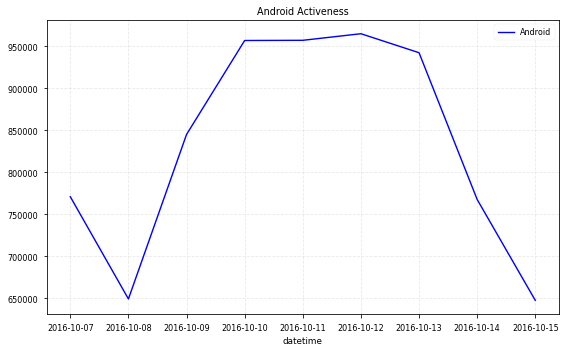

In [41]:
plt.subplots(figsize=(8,5))

df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', c='b');

plt.title("Android Activeness")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

In [42]:
df_ios = df_by_type(df_all, 'ALL', '2', 'ALL', 'ALL', 'ALL')
df_win = df_by_type(df_all, 'ALL', '3', 'ALL', 'ALL', 'ALL')
df_mac = df_by_type(df_all, 'ALL', '4', 'ALL', 'ALL', 'ALL')

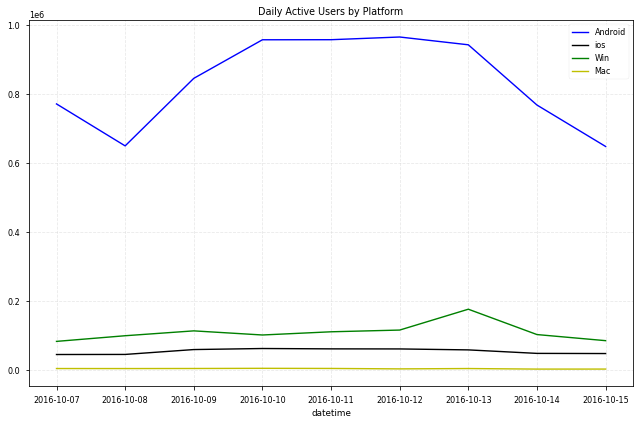

In [43]:
fig = plt.figure(figsize=(9,6))

df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', c='b');
df_ios.groupby("datetime").sum()['userCount'].plot(label='ios', c='k');
df_win.groupby("datetime").sum()['userCount'].plot(label='Win', c='g');
df_mac.groupby("datetime").sum()['userCount'].plot(label='Mac', c='y');

plt.title("Daily Active Users by Platform")
plt.legend()
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

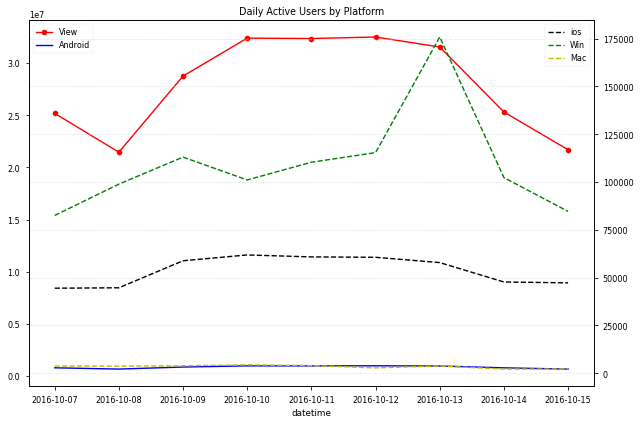

In [44]:
fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111)
df_view.groupby("datetime").sum()['userCount'].plot(label='View', ax=ax, marker='o', c='r')
df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', ax=ax, c='b');

ax2 = ax.twinx()
df_ios.groupby("datetime").sum()['userCount'].plot(label='ios', ax=ax2, c='k', linestyle='dashed');
df_win.groupby("datetime").sum()['userCount'].plot(label='Win', ax=ax2, c='g', linestyle='dashed');
df_mac.groupby("datetime").sum()['userCount'].plot(label='Mac', ax=ax2, c='y', linestyle='dashed');

plt.title("Daily Active Users by Platform")
ax.legend(loc=2)
ax2.legend(loc=1)
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

<Figure size 460.8x316.8 with 0 Axes>

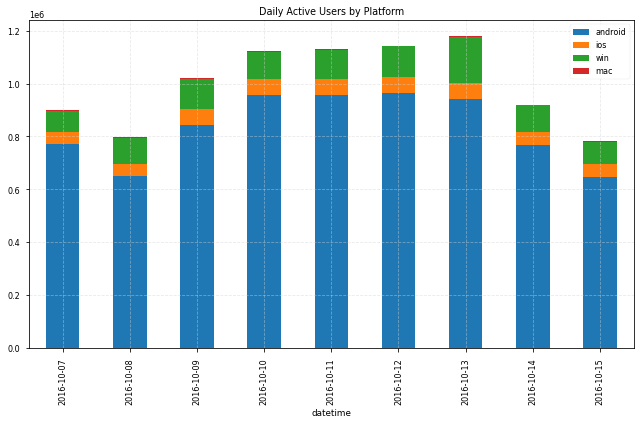

In [45]:
plt.figure()

aos = df_aos.groupby("datetime").sum()['userCount']
ios = df_ios.groupby("datetime").sum()['userCount']
win = df_win.groupby("datetime").sum()['userCount']
mac = df_mac.groupby("datetime").sum()['userCount']

# create a df
plf = pd.concat([aos, ios, win, mac], axis=1)
plf.columns = ['android', 'ios', 'win', 'mac']

# plot
plf.plot(kind='bar', stacked=True, figsize=(9,6));

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 결제 유무(isPaid)기준 데이터 탐색

In [46]:
df_all.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,1,1,1,0,A1,6
2,2016-10-07,1,1,1,0,AF,21
3,2016-10-07,1,1,1,0,AI,1
4,2016-10-07,1,1,1,0,AL,308
5,2016-10-07,1,1,1,0,AO,184


In [47]:
df_all.isPaid.value_counts()

ALL    64176
0      64056
1      16885
Name: isPaid, dtype: int64

- isPaid code
    - 0: Free
    - 1: Paid

In [48]:
df_free = df_by_type(df_all, 'ALL', 'ALL', 'ALL', '0', 'ALL')
df_paid = df_by_type(df_all, 'ALL', 'ALL', 'ALL', '1', 'ALL')

In [49]:
df_free.head(5)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
14209,2016-10-07,ALL,ALL,ALL,0,ALL,895125
41217,2016-10-08,ALL,ALL,ALL,0,ALL,789819
68641,2016-10-09,ALL,ALL,ALL,0,ALL,1011593
96739,2016-10-10,ALL,ALL,ALL,0,ALL,1114967
124999,2016-10-11,ALL,ALL,ALL,0,ALL,1122786


In [50]:
df_paid.head(5)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
23301,2016-10-07,ALL,ALL,ALL,1,ALL,2477
50195,2016-10-08,ALL,ALL,ALL,1,ALL,2331
77940,2016-10-09,ALL,ALL,ALL,1,ALL,2961
106169,2016-10-10,ALL,ALL,ALL,1,ALL,3111
134404,2016-10-11,ALL,ALL,ALL,1,ALL,3181


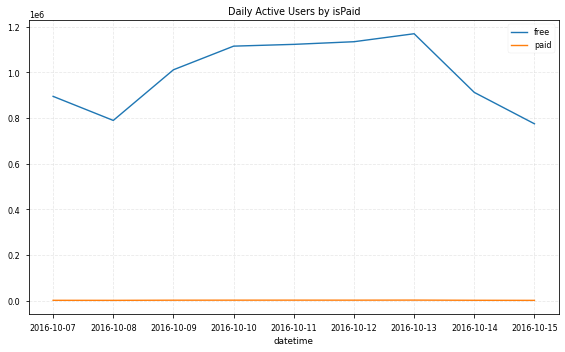

In [51]:
plt.subplots(figsize=(8,5))

df_free.groupby("datetime")['userCount'].sum().plot(label='free');
df_paid.groupby("datetime")['userCount'].sum().plot(label='paid');

plt.title("Daily Active Users by isPaid")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

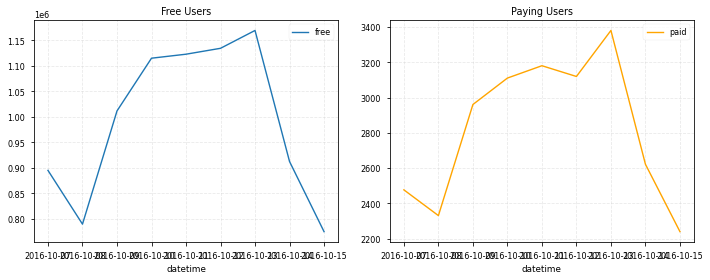

In [52]:
fig, ax = plt.subplots(1, 2)

df_free.groupby("datetime")['userCount'].sum().plot(label='free', ax=ax[0], figsize=(10,4));
ax[0].set_title("Free Users")
ax[0].legend()
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

df_paid.groupby("datetime")['userCount'].sum().plot(label='paid', ax=ax[1], color='orange');
ax[1].set_title("Paying Users")
ax[1].legend()
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

<Figure size 460.8x316.8 with 0 Axes>

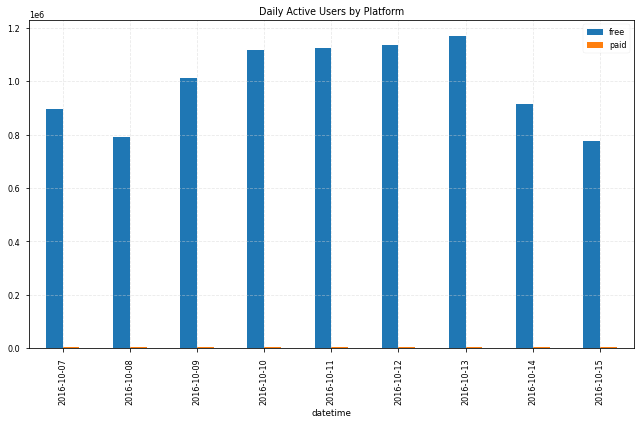

In [53]:
plt.figure()

free = df_free.groupby("datetime")['userCount'].sum()
paid = df_paid.groupby("datetime")['userCount'].sum()

# create a df
plf = pd.concat([free, paid], axis=1)
plf.columns = ['free', 'paid']

# plot
plf.plot(kind='bar', stacked=False, figsize=(9,6));

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

**Note**

- aswType, deviceType 기준으로 탐색 가능 --> 생략

### Cross Category 탐색
- 1) ostype & paid
- 2) aswtype & paid

In [54]:
# df, devicetype, ostype, aswtype, ispaid, countrycd
# android
df_aos_free = df_by_type(df_all, 'ALL', '1', 'ALL', '0', 'ALL')
df_aos_paid = df_by_type(df_all, 'ALL', '1', 'ALL', '1', 'ALL')

#ios
df_ios_free = df_by_type(df_all, 'ALL', '2', 'ALL', '0', 'ALL')
df_ios_paid = df_by_type(df_all, 'ALL', '2', 'ALL', '1', 'ALL')

# pc
df_win_free = df_by_type(df_all, 'ALL', '3', 'ALL', '0', 'ALL')
df_win_paid = df_by_type(df_all, 'ALL', '3', 'ALL', '1', 'ALL')

In [55]:
df_win_free.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
22190,2016-10-07,ALL,3,ALL,0,ALL,81544
49076,2016-10-08,ALL,3,ALL,0,ALL,97923
76792,2016-10-09,ALL,3,ALL,0,ALL,111653
105034,2016-10-10,ALL,3,ALL,0,ALL,99763
133262,2016-10-11,ALL,3,ALL,0,ALL,109019


In [56]:
df_win_paid.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
4138,2016-10-07,ALL,3,ALL,1,ALL,992
31285,2016-10-08,ALL,3,ALL,1,ALL,999
58270,2016-10-09,ALL,3,ALL,1,ALL,1372
86209,2016-10-10,ALL,3,ALL,1,ALL,1321
114489,2016-10-11,ALL,3,ALL,1,ALL,1343


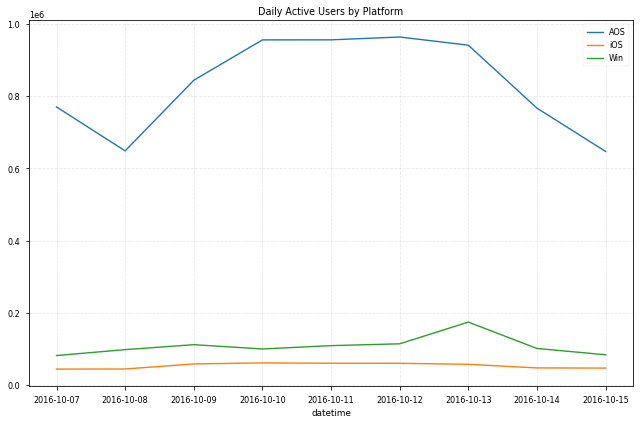

In [57]:
fig = plt.figure(figsize=(9,6))

df_aos_free.groupby("datetime")['userCount'].sum().plot(label='AOS');
df_ios_free.groupby("datetime")['userCount'].sum().plot(label='iOS');
df_win_free.groupby("datetime")['userCount'].sum().plot(label='Win');

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

<Figure size 648x432 with 0 Axes>

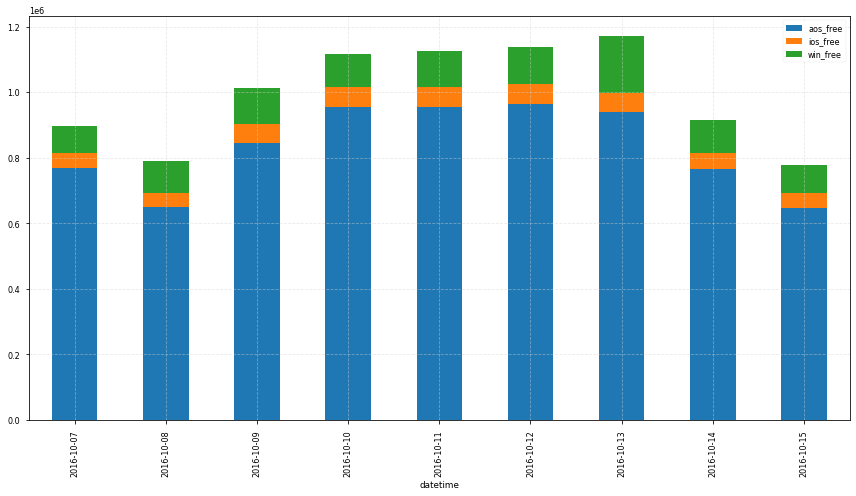

In [58]:
plt.figure(figsize=(9,6))

aos_free = df_aos_free.groupby("datetime")['userCount'].sum()
ios_free = df_ios_free.groupby("datetime")['userCount'].sum()
win_free = df_win_free.groupby("datetime")['userCount'].sum()

# create a df
plf = pd.concat([aos_free, ios_free, win_free], axis=1)
plf.columns = ['aos_free', 'ios_free', 'win_free']

# plot
plf.plot(kind='bar', stacked=True, figsize=(12,7));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

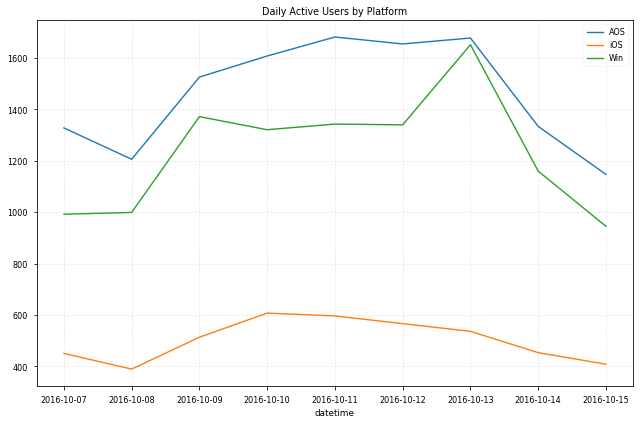

In [59]:
fig = plt.figure(figsize=(9,6))

df_aos_paid.groupby("datetime")['userCount'].sum().plot(label='AOS');
df_ios_paid.groupby("datetime")['userCount'].sum().plot(label='iOS');
df_win_paid.groupby("datetime")['userCount'].sum().plot(label='Win');

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

<Figure size 648x432 with 0 Axes>

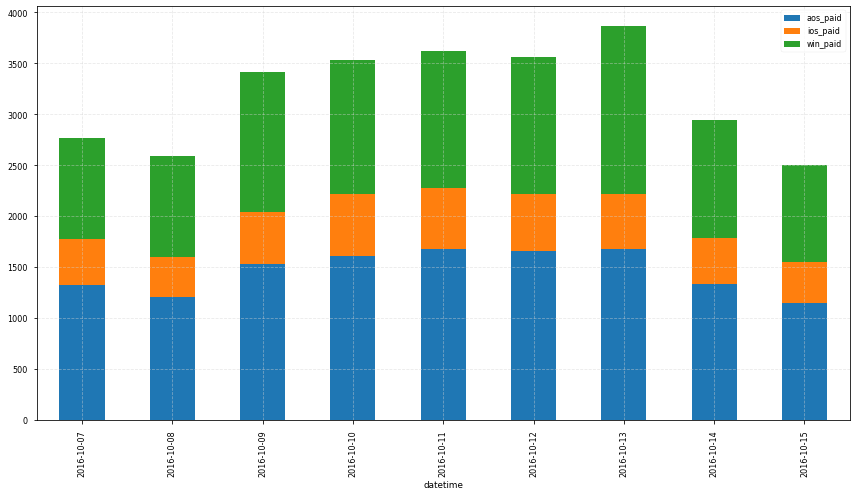

In [60]:
plt.figure(figsize=(9,6))

aos_paid = df_aos_paid.groupby("datetime")['userCount'].sum()
ios_paid = df_ios_paid.groupby("datetime")['userCount'].sum()
win_paid = df_win_paid.groupby("datetime")['userCount'].sum()

# create a df
plf = pd.concat([aos_paid, ios_paid, win_paid], axis=1)
plf.columns = ['aos_paid', 'ios_paid', 'win_paid']

# plot
plf.plot(kind='bar', stacked=True, figsize=(12,7));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 국가별 Activeness 탐색

In [61]:
# 상위 Top country
df_all.countryCode.value_counts()

ALL    1609
KR     1513
US     1509
JP     1348
GB     1329
       ... 
WS       64
YT       64
CF       64
CK       32
KI       32
Name: countryCode, Length: 229, dtype: int64

In [62]:
df_kr = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'KR')
df_us = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'US')
df_jp = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'JP')
df_gb = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'GB')
df_it = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'IT')
df_mx = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'MX')
df_es = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'ES')
df_br = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'BR')

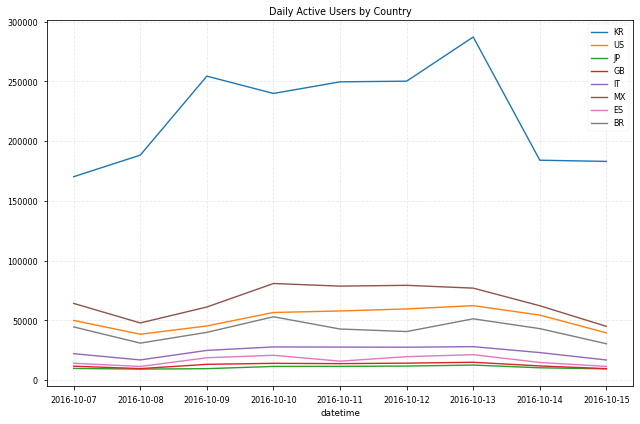

In [63]:
fig = plt.figure(figsize=(9,6))

df_kr.groupby("datetime")['userCount'].sum().plot(label='KR');
df_us.groupby("datetime")['userCount'].sum().plot(label='US');
df_jp.groupby("datetime")['userCount'].sum().plot(label='JP');
df_gb.groupby("datetime")['userCount'].sum().plot(label='GB');
df_it.groupby("datetime")['userCount'].sum().plot(label='IT');
df_mx.groupby("datetime")['userCount'].sum().plot(label='MX');
df_es.groupby("datetime")['userCount'].sum().plot(label='ES');
df_br.groupby("datetime")['userCount'].sum().plot(label='BR');

plt.title("Daily Active Users by Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

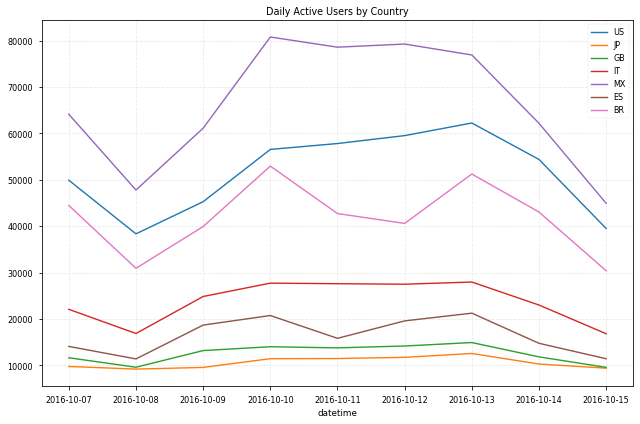

In [64]:
# zoom-in
fig = plt.figure(figsize=(9,6))

#df_kr.groupby("datetime")['userCount'].sum().plot(label='KR');
df_us.groupby("datetime")['userCount'].sum().plot(label='US');
df_jp.groupby("datetime")['userCount'].sum().plot(label='JP');
df_gb.groupby("datetime")['userCount'].sum().plot(label='GB');
df_it.groupby("datetime")['userCount'].sum().plot(label='IT');
df_mx.groupby("datetime")['userCount'].sum().plot(label='MX');
df_es.groupby("datetime")['userCount'].sum().plot(label='ES');
df_br.groupby("datetime")['userCount'].sum().plot(label='BR');

plt.title("Daily Active Users by Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 국가별 유료 유저 비중

In [65]:
df_paid_rate = df_all.query("countryCode == 'KR' or countryCode == 'US' or countryCode == 'JP' or countryCode == 'MX' or countryCode == 'BR'")\
                     .query("isPaid != 'ALL' and deviceTypeNo == 'ALL' and osTypeNo == 'ALL' and aswTypeNo == 'ALL'")

df_paid_rate.head(10)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
5144,2016-10-07,ALL,ALL,ALL,0,BR,44430
5167,2016-10-07,ALL,ALL,ALL,0,JP,9592
5168,2016-10-07,ALL,ALL,ALL,0,KR,169306
5219,2016-10-07,ALL,ALL,ALL,1,MX,30
5230,2016-10-07,ALL,ALL,ALL,1,US,561
14287,2016-10-07,ALL,ALL,ALL,1,BR,42
14298,2016-10-07,ALL,ALL,ALL,1,JP,152
14299,2016-10-07,ALL,ALL,ALL,1,KR,882
23273,2016-10-07,ALL,ALL,ALL,0,MX,64116
23294,2016-10-07,ALL,ALL,ALL,0,US,49355


In [66]:
df_paid_rate1 = df_paid_rate.groupby(['countryCode', 'isPaid'])['userCount'].sum().unstack().reset_index()
df_paid_rate1.columns = ['countryCode', 'free', 'paid']

df_paid_rate1['paid_raio'] = (df_paid_rate1['paid'] / (df_paid_rate1['paid'] + df_paid_rate1['free']) * 100)

df_paid_rate1.sort_values('paid_raio', ascending=False)

,countryCode,free,paid,paid_raio
1,JP,93866,1366,1.434392
4,US,458621,5006,1.079747
2,KR,1996221,10306,0.513624
0,BR,375981,308,0.081852
3,MX,595549,304,0.051019


###  EDA Summary
- 기존 DAU에 허수값 존재. 따라서 기준 all(View+Edit+Export)로 활동성 지표를 변경!
- 활동성은 안드로이드가 절대적으로 높음 (Win > iOS > Mac)
    - 특히 android 무료 이용자 비율이  매우 높음
    - 유료 이용자의 경우 윈도우(PC) 사용 경향이 높은 편
- 국가별 분석결과, 무료 및 유료 이용자 모두 한국이 많음 (유료의 경우 미국이 특히 높음)